<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


'wget' is not recognized as an internal or external command,
operable program or batch file.


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



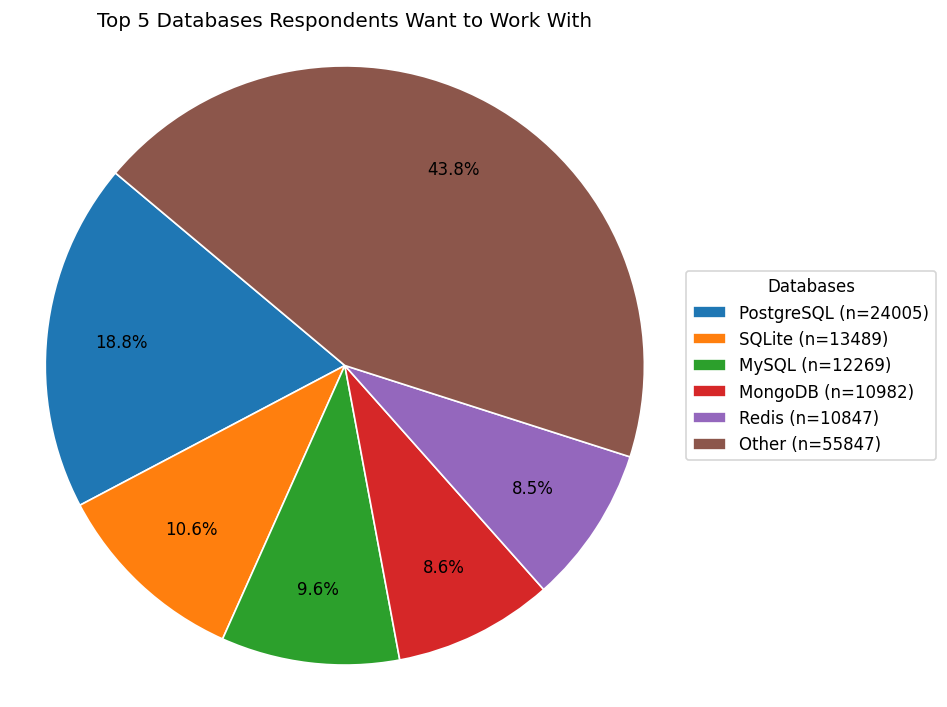

In [4]:
##Write your code here
# Lab 21 — Task 1.1
# Pie chart: Top 5 databases respondents want to work with
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- helper: find the right column name if it varies ---
def find_col(candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

db_col = find_col([
    "DatabaseWantToWorkWith",          # expected lab name
    "DatabaseDesiredNextYear",         # common variant
    "DatabaseDesireNextYear",
    "DatabaseWantToWorkWith_2023",
    "DatabasesWantToWorkWith"
])

if not db_col:
    print("❌ Couldn't find the database 'want to work with' column.",
          "\nAvailable columns (first 30):", list(df.columns)[:30])
else:
    # --- tidy to long form ---
    tmp = df[[db_col]].dropna()
    tmp[db_col] = tmp[db_col].astype(str).str.strip()
    tmp = tmp[tmp[db_col].str.lower().ne("nan")]

    # Split on common delimiters and explode
    tmp = tmp.assign(Database=tmp[db_col].str.split(r"[;,\|/]")).explode("Database")
    tmp["Database"] = tmp["Database"].astype(str).str.strip()
    tmp = tmp[tmp["Database"].ne("")]

    # Optional light normalization for very common aliases
    def normalize_db(name):
        s = name.strip()
        if re.fullmatch(r"(?i)(postgres|postgresql)", s): return "PostgreSQL"
        if re.search(r"(?i)microsoft\s*sql\s*server|ms\s*sql", s): return "SQL Server"
        return s
    tmp["Database"] = tmp["Database"].map(normalize_db)

    # --- counts ---
    counts = tmp["Database"].value_counts()
    if counts.empty:
        print("⚠️ No database responses found after cleaning.")
    else:
        top5 = counts.head(5)
        other_n = counts.iloc[5:].sum()

        labels = top5.index.tolist()
        sizes  = top5.values.astype(float)

        # Include an "Other" slice so percentages reflect the full distribution
        if other_n > 0:
            labels += ["Other"]
            sizes   = np.append(sizes, float(other_n))

        # --- plot ---
        fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

        # Use autopct for percentages; keep labels in legend to avoid clutter
        wedges, texts, autotexts = ax.pie(
            sizes,
            labels=None,
            startangle=140,
            autopct=lambda p: f"{p:.1f}%",
            pctdistance=0.75,
            wedgeprops=dict(edgecolor="white", linewidth=1)
        )

        # Legend with counts
        legend_labels = [f"{lab} (n={int(n)})" for lab, n in zip(labels, sizes)]
        ax.legend(wedges, legend_labels, title="Databases", loc="center left", bbox_to_anchor=(1, 0.5))

        ax.set_title("Top 5 Databases Respondents Want to Work With")
        ax.axis("equal")  # equal aspect ratio for a perfect circle
        plt.tight_layout()
        plt.show()


1.2. The `DevType` column lists the developer types for respondents. We’ll examine he distribution by showing the top 5 developer roles in a pie chart.



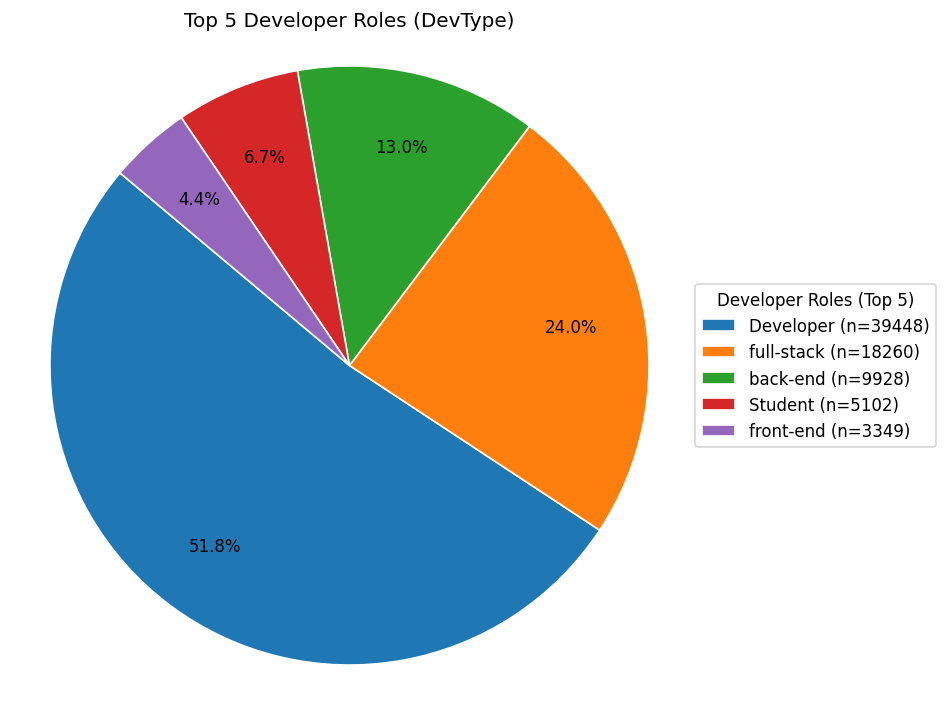

In [5]:
##Write your code here
# Lab 21 — Task 1.2
# Pie chart: Top 5 developer roles from DevType

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Helper to find the correct column (in case naming varies)
def find_col(candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

dev_col = find_col(["DevType", "DeveloperType", "Developer_Type"])
if not dev_col:
    print("❌ Couldn't find the DevType column.",
          "\nAvailable columns (first 30):", list(df.columns)[:30])
else:
    # Tidy to long form: split multi-select cells and explode
    tmp = df[[dev_col]].dropna()
    tmp[dev_col] = tmp[dev_col].astype(str).str.strip()
    tmp = tmp[tmp[dev_col].str.lower().ne("nan")]

    # Split on common delimiters (Stack Overflow uses ';')
    tmp = tmp.assign(Role=tmp[dev_col].str.split(r"[;,\|/]")).explode("Role")
    tmp["Role"] = tmp["Role"].astype(str).str.strip()
    tmp = tmp[tmp["Role"].ne("")]

    # Optional light normalization for common aliases (edit as needed)
    def normalize_role(s):
        s = s.strip()
        s = re.sub(r"\s+", " ", s)  # collapse spaces
        return s
    tmp["Role"] = tmp["Role"].map(normalize_role)

    # Count roles and take top 5
    counts = tmp["Role"].value_counts()
    if counts.empty:
        print("⚠️ No developer roles found after cleaning.")
    else:
        top5 = counts.head(5)
        labels = top5.index.tolist()
        sizes  = top5.values.astype(float)

        # Plot pie
        fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
        wedges, texts, autotexts = ax.pie(
            sizes,
            labels=None,                 # keep labels in legend (cleaner)
            startangle=140,
            autopct=lambda p: f"{p:.1f}%",
            pctdistance=0.75,
            wedgeprops=dict(edgecolor="white", linewidth=1)
        )

        # Legend with counts
        legend_labels = [f"{lab} (n={int(n)})" for lab, n in zip(labels, sizes)]
        ax.legend(wedges, legend_labels, title="Developer Roles (Top 5)",
                  loc="center left", bbox_to_anchor=(1, 0.5))

        ax.set_title("Top 5 Developer Roles (DevType)")
        ax.axis("equal")  # perfect circle
        plt.tight_layout()
        plt.show()


##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



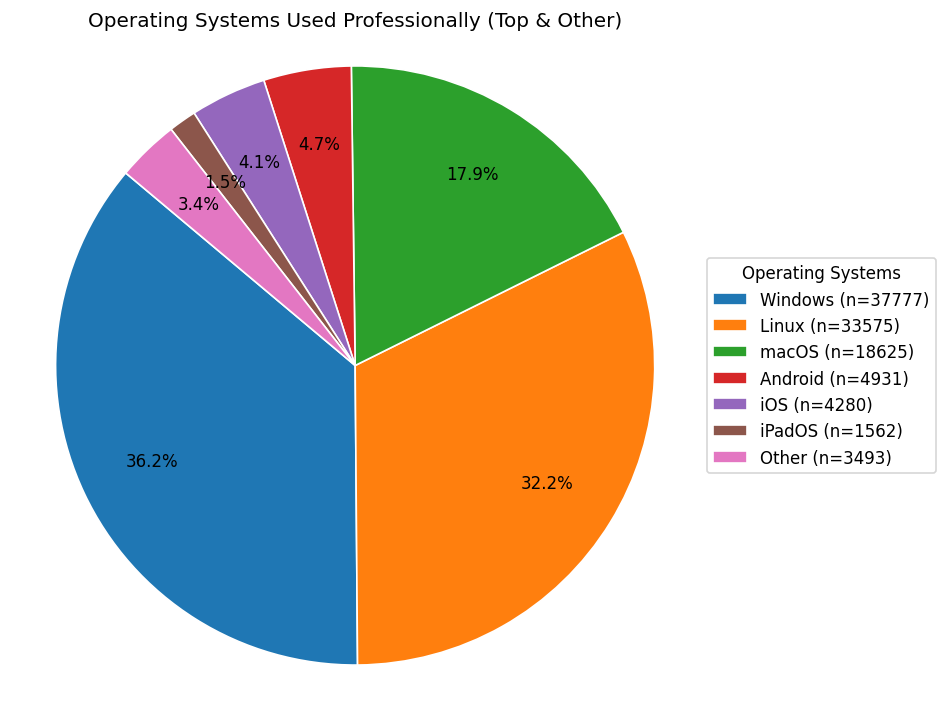

In [6]:
##Write your code here
# Lab 21 — Task 1.3
# Pie chart: Operating systems used professionally (OpSysProfessional)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- helper: find the right column name (in case it varies) ---
def find_col(candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

ops_col = find_col([
    "OpSysProfessional",          # expected
    "OpSysProfessional use",      # sometimes appears with a space
    "OpSysProfessionalUse",
    "OpSysPro",
    "OpSys_Professional"
])

if not ops_col:
    print("❌ Couldn't find the professional OS column.",
          "\nAvailable columns (first 30):", list(df.columns)[:30])
else:
    # --- tidy to long form ---
    tmp = df[[ops_col]].dropna()
    tmp[ops_col] = tmp[ops_col].astype(str).str.strip()
    tmp = tmp[tmp[ops_col].str.lower().ne("nan")]

    # Split on common delimiters and explode
    tmp = tmp.assign(Op=tmp[ops_col].str.split(r"[;,\|/]")).explode("Op")
    tmp["Op"] = tmp["Op"].astype(str).str.strip()
    tmp = tmp[tmp["Op"].ne("")]

    # --- light normalization of OS names ---
    def normalize_os(s):
        t = s.strip().lower()

        # Windows (any version or server)
        if "windows" in t: 
            return "Windows"

        # macOS / OS X
        if "mac" in t or "os x" in t:
            return "macOS"

        # Linux (any distro)
        linux_markers = ["linux", "ubuntu", "debian", "fedora", "arch", "mint",
                         "centos", "red hat", "rhel", "suse"]
        if any(k in t for k in linux_markers):
            return "Linux"

        # ChromeOS
        if "chrome" in t:
            return "ChromeOS"

        # BSD / *nix
        if "bsd" in t:
            return "BSD"
        if "unix" in t and "linux" not in t:
            return "Unix"

        # Mobile (occasionally reported)
        if "android" in t:
            return "Android"
        if "ios" in t:
            return "iOS"

        # Fallback: original string (title-cased)
        return re.sub(r"\s+", " ", s).strip()

    tmp["OpNorm"] = tmp["Op"].map(normalize_os)

    # --- counts ---
    counts = tmp["OpNorm"].value_counts()
    if counts.empty:
        print("⚠️ No operating system responses found after cleaning.")
    else:
        TOP_N = 6  # adjust if you want more/less categories shown
        topN = counts.head(TOP_N)
        other_n = counts.iloc[TOP_N:].sum()

        labels = topN.index.tolist()
        sizes  = topN.values.astype(float)

        # Include an "Other" slice so percentages reflect the full distribution
        if other_n > 0:
            labels += ["Other"]
            sizes   = np.append(sizes, float(other_n))

        # --- plot ---
        fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
        wedges, texts, autotexts = ax.pie(
            sizes,
            labels=None,                 # keep labels in legend for readability
            startangle=140,
            autopct=lambda p: f"{p:.1f}%",
            pctdistance=0.75,
            wedgeprops=dict(edgecolor="white", linewidth=1)
        )

        # Legend with counts
        legend_labels = [f"{lab} (n={int(n)})" for lab, n in zip(labels, sizes)]
        ax.legend(wedges, legend_labels, title="Operating Systems",
                  loc="center left", bbox_to_anchor=(1, 0.5))

        ax.set_title("Operating Systems Used Professionally (Top & Other)")
        ax.axis("equal")  # perfect circle
        plt.tight_layout()
        plt.show()


### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



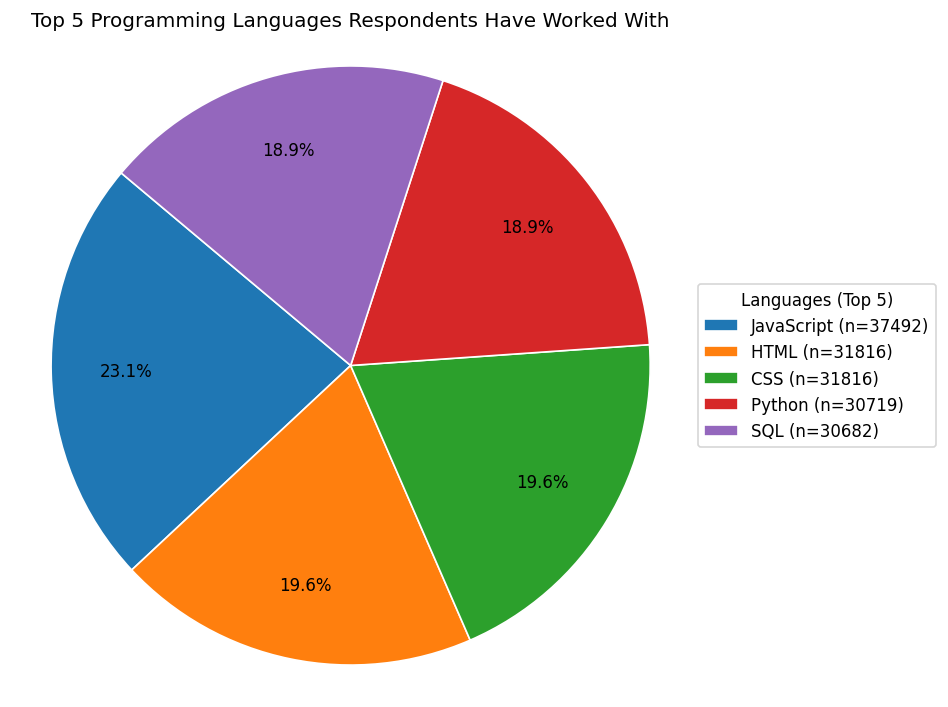

In [7]:
##Write your code here
# Lab 21 — Task 2.1
# Pie chart: Top 5 languages from LanguageHaveWorkedWith

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Helper: find the correct column if names vary
def find_col(candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

lang_col = find_col([
    "LanguageHaveWorkedWith",     # expected lab name
    "LanguagesWorkedWith",        # common variant
    "LanguageWorkedWith",
])
if not lang_col:
    print("❌ Couldn't find the LanguageHaveWorkedWith column.",
          "\nAvailable columns (first 30):", list(df.columns)[:30])
else:
    # Tidy to long form: split multi-select cells and explode
    tmp = df[[lang_col]].dropna()
    tmp[lang_col] = tmp[lang_col].astype(str).str.strip()
    tmp = tmp[tmp[lang_col].str.lower().ne("nan")]

    # Split on common delimiters (SO uses ';'), then explode
    tmp = tmp.assign(Language=tmp[lang_col].str.split(r"[;,\|/]")).explode("Language")
    tmp["Language"] = tmp["Language"].astype(str).str.strip()
    tmp = tmp[tmp["Language"].ne("")]

    # (Optional) light normalization for a couple of common aliases
    def norm_lang(s):
        t = s.strip()
        if re.fullmatch(r"(?i)js|javascript", t): return "JavaScript"
        if re.fullmatch(r"(?i)ts|typescript", t): return "TypeScript"
        if re.fullmatch(r"(?i)postgres|postgresql", t): return "PostgreSQL"
        return t
    tmp["Language"] = tmp["Language"].map(norm_lang)

    # Count and select top 5
    counts = tmp["Language"].value_counts()
    if counts.empty:
        print("⚠️ No language responses found after cleaning.")
    else:
        top5 = counts.head(5)
        labels = top5.index.tolist()
        sizes  = top5.values.astype(float)

        # Plot pie (labels in legend for readability)
        fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
        wedges, texts, autotexts = ax.pie(
            sizes,
            labels=None,
            startangle=140,
            autopct=lambda p: f"{p:.1f}%",
            pctdistance=0.75,
            wedgeprops=dict(edgecolor="white", linewidth=1)
        )

        # Legend with counts
        legend_labels = [f"{lab} (n={int(n)})" for lab, n in zip(labels, sizes)]
        ax.legend(wedges, legend_labels, title="Languages (Top 5)",
                  loc="center left", bbox_to_anchor=(1, 0.5))

        ax.set_title("Top 5 Programming Languages Respondents Have Worked With")
        ax.axis("equal")  # perfect circle
        plt.tight_layout()
        plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



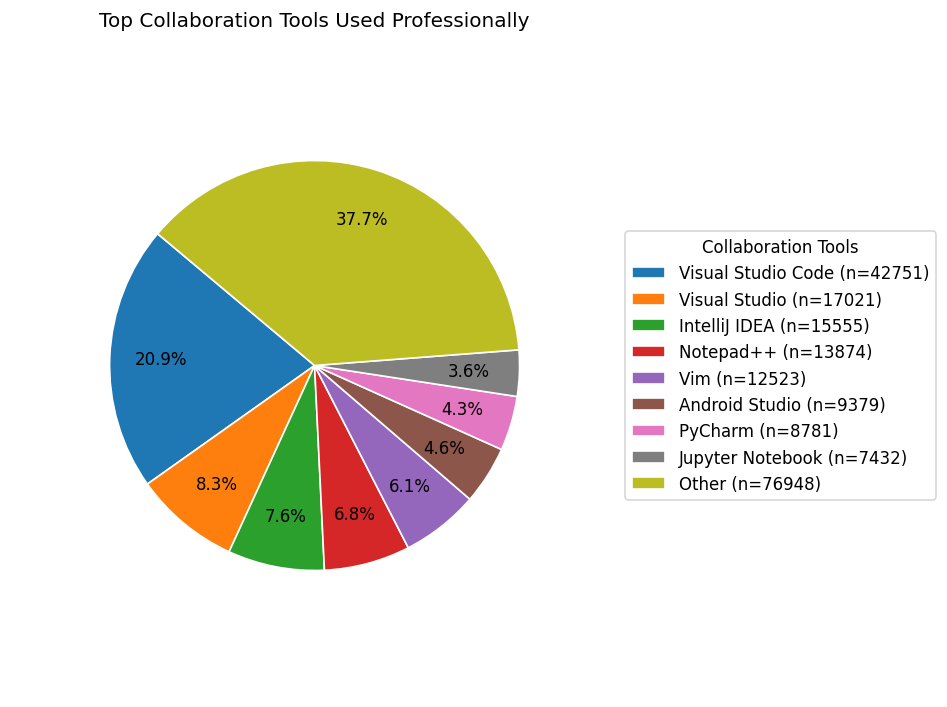

In [8]:
##Write your code here
# Lab 21 — Task 2.2
# Pie chart: Top collaboration tools used professionally (NEWCollabToolsHaveWorkedWith)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- helper: find the right column name if it varies ---
def find_col(candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

collab_col = find_col([
    "NEWCollabToolsHaveWorkedWith",   # expected Stack Overflow field
    "CollabToolsHaveWorkedWith",
    "CollaborationToolsHaveWorkedWith",
    "NEWCollabToolsWorkedWith",
    "CollaborationTools"
])

if not collab_col:
    print("❌ Couldn't find the collaboration tools column.",
          "\nAvailable columns (first 30):", list(df.columns)[:30])
else:
    # --- tidy to long form ---
    tmp = df[[collab_col]].dropna()
    tmp[collab_col] = tmp[collab_col].astype(str).str.strip()
    tmp = tmp[tmp[collab_col].str.lower().ne("nan")]

    # Split on common delimiters (SO uses ';'), then explode
    tmp = tmp.assign(Tool=tmp[collab_col].str.split(r"[;,\|/]")).explode("Tool")
    tmp["Tool"] = tmp["Tool"].astype(str).str.strip()
    tmp = tmp[tmp["Tool"].ne("")]

    # --- light normalization of common tool names ---
    def norm_tool(s):
        t = s.strip().lower()
        # Microsoft Teams
        if ("teams" in t and "microsoft" in t) or re.fullmatch(r"(ms\s*)?teams", t):
            return "Microsoft Teams"
        # Slack
        if "slack" in t:
            return "Slack"
        # Zoom
        if "zoom" in t:
            return "Zoom"
        # Google Meet / Hangouts Meet
        if "google meet" in t or ("meet" in t and "google" in t) or "hangouts meet" in t:
            return "Google Meet"
        # Google Chat
        if "google chat" in t:
            return "Google Chat"
        # Jira / Confluence
        if "jira" in t:
            return "Jira"
        if "confluence" in t:
            return "Confluence"
        # GitHub / GitLab / Bitbucket (often used for collab)
        if "github" in t:
            return "GitHub"
        if "gitlab" in t:
            return "GitLab"
        if "bitbucket" in t:
            return "Bitbucket"
        # Trello / Asana / Notion
        if "trello" in t:
            return "Trello"
        if "asana" in t:
            return "Asana"
        if "notion" in t:
            return "Notion"
        # Skype / Webex
        if "skype" in t:
            return "Skype"
        if "webex" in t or "cisco webex" in t:
            return "Webex"
        # Miro / Figma
        if "miro" in t:
            return "Miro"
        if "figma" in t:
            return "Figma"
        # Fallback: title-case the original
        return re.sub(r"\s+", " ", s).strip()

    tmp["ToolNorm"] = tmp["Tool"].map(norm_tool)

    # --- counts ---
    counts = tmp["ToolNorm"].value_counts()
    if counts.empty:
        print("⚠️ No collaboration tool responses found after cleaning.")
    else:
        TOP_N = 8  # adjust if you want more/less categories shown
        topN = counts.head(TOP_N)
        other_n = counts.iloc[TOP_N:].sum()

        labels = topN.index.tolist()
        sizes  = topN.values.astype(float)

        # Include an "Other" slice so percentages reflect the full distribution
        if other_n > 0:
            labels += ["Other"]
            sizes   = np.append(sizes, float(other_n))

        # --- plot ---
        fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
        wedges, texts, autotexts = ax.pie(
            sizes,
            labels=None,                 # keep labels in legend (cleaner)
            startangle=140,
            autopct=lambda p: f"{p:.1f}%",
            pctdistance=0.75,
            wedgeprops=dict(edgecolor="white", linewidth=1)
        )

        # Legend with counts
        legend_labels = [f"{lab} (n={int(n)})" for lab, n in zip(labels, sizes)]
        ax.legend(wedges, legend_labels, title="Collaboration Tools",
                  loc="center left", bbox_to_anchor=(1, 0.5))

        ax.set_title("Top Collaboration Tools Used Professionally")
        ax.axis("equal")  # perfect circle
        plt.tight_layout()
        plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



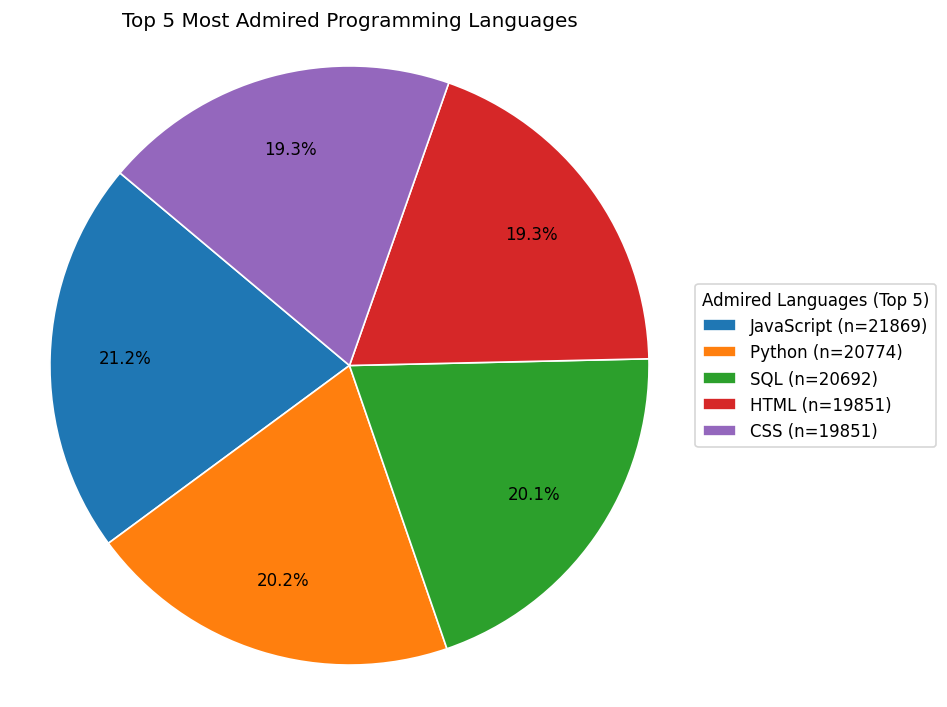

In [9]:
##Write your code here
# Lab 21 — Task 3.1
# Pie chart: Top 5 admired programming languages (LanguageAdmired)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Helper: find the correct column if names vary across datasets
def find_col(candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

admired_col = find_col([
    "LanguageAdmired",            # expected lab name
    "LanguageWantToWorkWith",     # common SO variant
    "LanguageDesiredNextYear",
    "LanguageDesireNextYear"
])

if not admired_col:
    print("❌ Couldn't find the admired languages column.",
          "\nAvailable columns (first 30):", list(df.columns)[:30])
else:
    # Tidy to long form: split multi-select cells and explode
    tmp = df[[admired_col]].dropna().copy()
    tmp[admired_col] = tmp[admired_col].astype(str).str.strip()
    tmp = tmp[tmp[admired_col].str.lower().ne("nan")]

    tmp = tmp.assign(Language=tmp[admired_col].str.split(r"[;,\|/]")).explode("Language")
    tmp["Language"] = tmp["Language"].astype(str).str.strip()
    tmp = tmp[tmp["Language"].ne("")]

    # Optional: light normalization for common aliases
    def norm_lang(s):
        t = s.strip()
        if re.fullmatch(r"(?i)js|javascript", t): return "JavaScript"
        if re.fullmatch(r"(?i)ts|typescript", t): return "TypeScript"
        if re.fullmatch(r"(?i)c\+\+", t):         return "C++"
        if re.fullmatch(r"(?i)c#|c-sharp", t):    return "C#"
        if re.fullmatch(r"(?i)postgres|postgresql", t): return "PostgreSQL"
        return re.sub(r"\s+", " ", t)
    tmp["Language"] = tmp["Language"].map(norm_lang)

    # Count and take top 5
    counts = tmp["Language"].value_counts()
    if counts.empty:
        print("⚠️ No admired-language responses found after cleaning.")
    else:
        top5 = counts.head(5)
        labels = top5.index.tolist()
        sizes  = top5.values.astype(float)

        # Plot pie (labels in legend for readability)
        fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
        wedges, texts, autotexts = ax.pie(
            sizes,
            labels=None,
            startangle=140,
            autopct=lambda p: f"{p:.1f}%",
            pctdistance=0.75,
            wedgeprops=dict(edgecolor="white", linewidth=1)
        )

        legend_labels = [f"{lab} (n={int(n)})" for lab, n in zip(labels, sizes)]
        ax.legend(wedges, legend_labels, title="Admired Languages (Top 5)",
                  loc="center left", bbox_to_anchor=(1, 0.5))

        ax.set_title("Top 5 Most Admired Programming Languages")
        ax.axis("equal")  # perfect circle
        plt.tight_layout()
        plt.show()


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



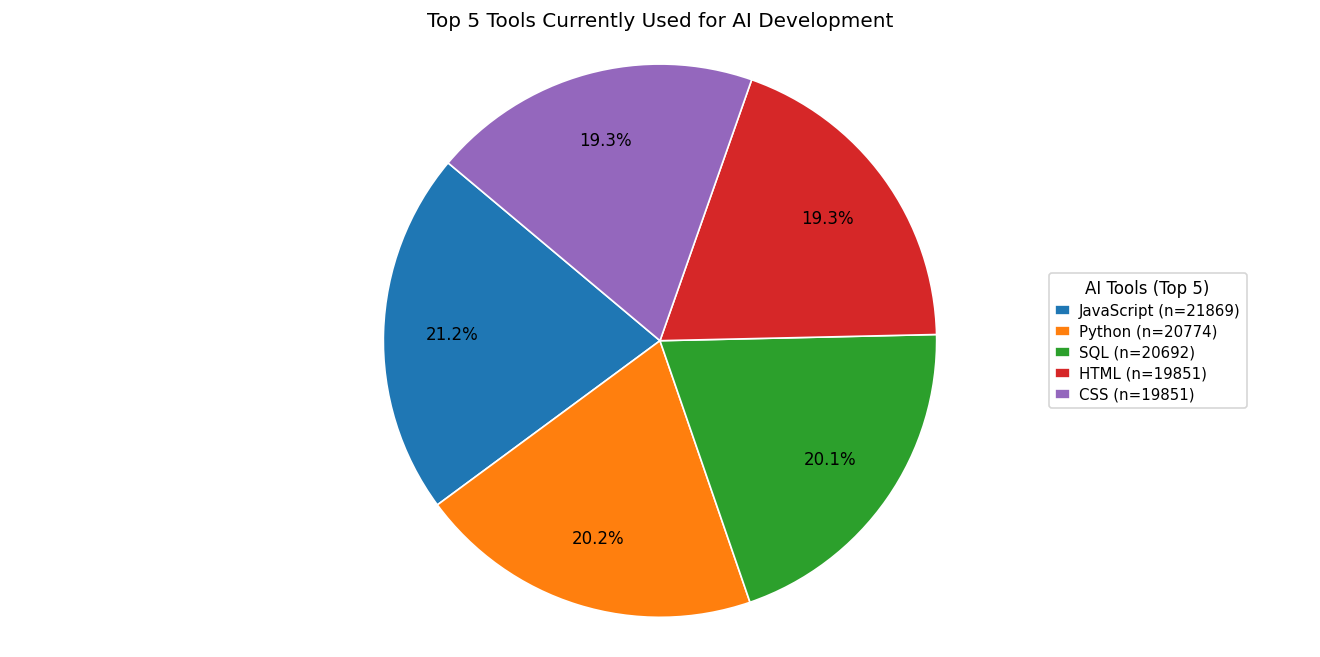

In [10]:
##Write your code here
# --- BIGGER PIE, COMPACT LEGEND ---
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)

# Give the pie more canvas area (move axes left & widen)
ax.set_position([0.05, 0.08, 0.62, 0.84])   # [left, bottom, width, height]

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    startangle=140,
    autopct=lambda p: f"{p:.1f}%",
    pctdistance=0.75,
    wedgeprops=dict(edgecolor="white", linewidth=1),
    radius=1.25   # <- enlarge the pie itself
)

# Compact legend on the right
legend = ax.legend(
    wedges,
    [f"{lab} (n={int(n)})" for lab, n in zip(labels, sizes)],
    title="AI Tools (Top 5)",
    loc="center left",
    bbox_to_anchor=(0.80, 0.5),   # anchor farther right
    frameon=True,
    borderaxespad=0.0,
    handlelength=1.0,
    handletextpad=0.6,
    labelspacing=0.4,
    prop={"size": 9}              # smaller legend text
)
legend.get_title().set_fontsize(10)

ax.set_title("Top 5 Tools Currently Used for AI Development")
ax.axis("equal")
plt.tight_layout()
plt.show()


##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



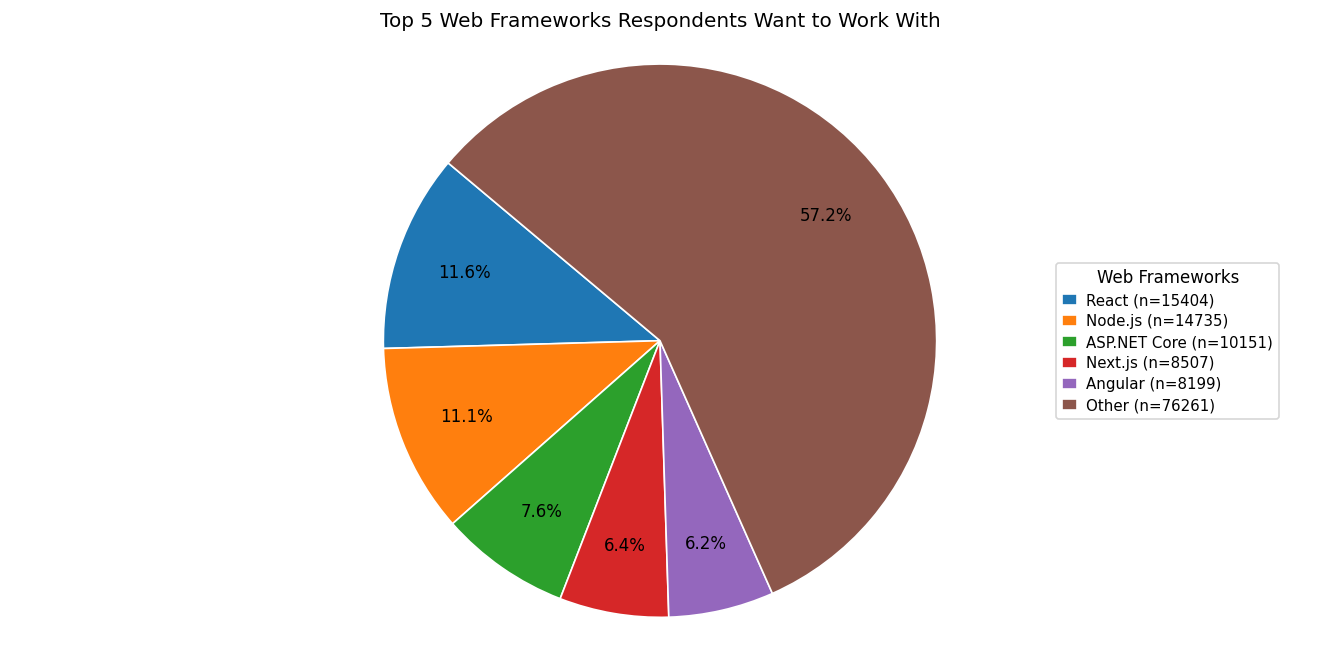

In [11]:
##Write your code here
# Lab 21 — Task 3.3
# Pie chart: Top 5 web frameworks respondents want to work with

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- helper: find the right column name if it varies ---
def find_col(candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

wf_col = find_col([
    "WebframeWantToWorkWith",          # expected
    "WebFrameworkWantToWorkWith",
    "WebframeDesiredNextYear",
    "WebFrameworkDesireNextYear",
    "WebFrameWorkedWith_WantToWorkWith"
])

if not wf_col:
    print("❌ Couldn't find the web frameworks column.",
          "\nAvailable columns (first 30):", list(df.columns)[:30])
else:
    # --- tidy to long form: split & explode ---
    tmp = df[[wf_col]].dropna().copy()
    tmp[wf_col] = tmp[wf_col].astype(str).str.strip()
    tmp = tmp[tmp[wf_col].str.lower().ne("nan")]

    tmp = tmp.assign(Framework=tmp[wf_col].str.split(r"[;,\|/]")).explode("Framework")
    tmp["Framework"] = tmp["Framework"].astype(str).str.strip()
    tmp = tmp[tmp["Framework"].ne("")]

    # --- normalize common framework aliases ---
    def norm_fw(s):
        t = s.strip().lower()
        # Frontend
        if "react" in t:                     return "React"
        if "angular" in t:                   return "Angular"
        if "vue" in t:                       return "Vue.js"
        if "svelte" in t:                    return "Svelte"
        if "next" in t:                      return "Next.js"
        if "nuxt" in t:                      return "Nuxt.js"
        # Backend / full-stack
        if "express" in t:                   return "Express"
        if "fastapi" in t:                   return "FastAPI"
        if "django" in t:                    return "Django"
        if "flask" in t:                     return "Flask"
        if "asp.net" in t or "aspnet" in t:  return "ASP.NET Core"
        if "spring" in t:                    return "Spring"
        if "laravel" in t:                   return "Laravel"
        if "rails" in t:                     return "Ruby on Rails"
        if "symfony" in t:                   return "Symfony"
        return re.sub(r"\s+", " ", s).strip()
    tmp["Framework"] = tmp["Framework"].map(norm_fw)

    # --- counts ---
    counts = tmp["Framework"].value_counts()
    if counts.empty:
        print("⚠️ No web framework responses found after cleaning.")
    else:
        top5 = counts.head(5)
        other_n = counts.iloc[5:].sum()

        labels = top5.index.tolist()
        sizes  = top5.values.astype(float)
        if other_n > 0:
            labels += ["Other"]
            sizes   = np.append(sizes, float(other_n))

        # --- plot (bigger pie, compact legend) ---
        fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
        ax.set_position([0.05, 0.08, 0.62, 0.84])  # give pie more room

        wedges, texts, autotexts = ax.pie(
            sizes,
            labels=None,
            startangle=140,
            autopct=lambda p: f"{p:.1f}%",
            pctdistance=0.75,
            wedgeprops=dict(edgecolor="white", linewidth=1),
            radius=1.25
        )

        legend_labels = [f"{lab} (n={int(n)})" for lab, n in zip(labels, sizes)]
        leg = ax.legend(
            wedges, legend_labels, title="Web Frameworks",
            loc="center left", bbox_to_anchor=(0.80, 0.5),
            frameon=True, handlelength=1.0, handletextpad=0.6,
            labelspacing=0.4, prop={"size": 9}
        )
        leg.get_title().set_fontsize(10)

        ax.set_title("Top 5 Web Frameworks Respondents Want to Work With")
        ax.axis("equal")
        plt.tight_layout()
        plt.show()


##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



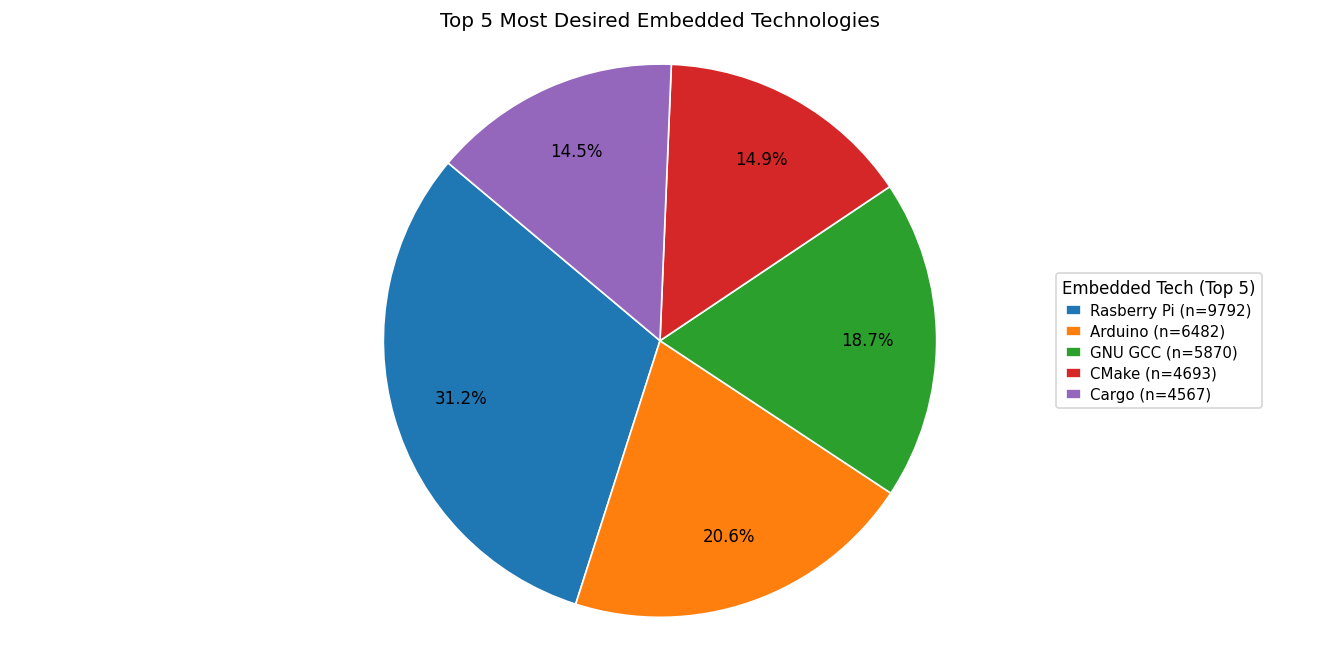

In [12]:
##Write your code here
# Lab 21 — Task 3.4
# Pie chart: Top 5 most desired embedded technologies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Find the right column name if it varies
def find_col(cands):
    for c in cands:
        if c in df.columns:
            return c
    return None

emb_col = find_col([
    "EmbeddedWantToWorkWith",           # expected
    "EmbeddedDesiredNextYear",
    "EmbeddedDesireNextYear",
    "EmbeddedFrameworkWantToWorkWith",
    "EmbeddedTechWantToWorkWith",
    "MiscTechWantToWorkWith"            # fallback in some datasets
])

if not emb_col:
    print("❌ Couldn't find the embedded-tech column. Columns:", list(df.columns)[:30])
else:
    # Split multi-select cells and explode
    tmp = df[[emb_col]].dropna().copy()
    tmp[emb_col] = tmp[emb_col].astype(str).str.strip()
    tmp = tmp[tmp[emb_col].str.lower().ne("nan")]

    tmp = tmp.assign(Tech=tmp[emb_col].str.split(r"[;,\|/]")).explode("Tech")
    tmp["Tech"] = tmp["Tech"].astype(str).str.strip()
    tmp = tmp[tmp["Tech"].ne("")]

    # Normalize common embedded tech names
    def norm_emb(s):
        t = s.strip().lower()
        if "arduino" in t:                          return "Arduino"
        if "raspberry" in t or re.search(r"\brpi\b", t):  return "Raspberry Pi"
        if "esp32" in t:                            return "ESP32"
        if "esp8266" in t:                          return "ESP8266"
        if "stm32" in t:                            return "STM32"
        if "freertos" in t:                         return "FreeRTOS"
        if "zephyr" in t:                           return "Zephyr RTOS"
        if "mbed" in t:                             return "Mbed OS"
        if re.search(r"ti[-\s]?rtos", t):           return "TI-RTOS"
        if "micropython" in t:                      return "MicroPython"
        if "beaglebone" in t:                       return "BeagleBone"
        if "nrf" in t or "nordic" in t:             return "Nordic nRF"
        if re.fullmatch(r"pic", t) or ("microchip" in t and "pic" in t): 
                                                     return "Microchip PIC"
        if "avr" in t or "atmel" in t:              return "Atmel AVR"
        if "riot" in t:                              return "RIOT OS"
        if "vxworks" in t:                           return "VxWorks"
        return re.sub(r"\s+", " ", s).strip()

    tmp["TechNorm"] = tmp["Tech"].map(norm_emb)

    # Count & take top 5
    counts = tmp["TechNorm"].value_counts()
    if counts.empty:
        print("⚠️ No embedded technology responses found after cleaning.")
    else:
        top5 = counts.head(5)
        labels = top5.index.tolist()
        sizes  = top5.values.astype(float)

        # Plot (bigger pie, compact legend on right)
        fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
        ax.set_position([0.05, 0.08, 0.62, 0.84])  # give pie more room

        wedges, texts, autotexts = ax.pie(
            sizes,
            labels=None,
            startangle=140,
            autopct=lambda p: f"{p:.1f}%",
            pctdistance=0.75,
            wedgeprops=dict(edgecolor="white", linewidth=1),
            radius=1.25
        )

        legend_labels = [f"{lab} (n={int(n)})" for lab, n in zip(labels, sizes)]
        leg = ax.legend(
            wedges, legend_labels, title="Embedded Tech (Top 5)",
            loc="center left", bbox_to_anchor=(0.80, 0.5),
            frameon=True, handlelength=1.0, handletextpad=0.6,
            labelspacing=0.4, prop={"size": 9}
        )
        leg.get_title().set_fontsize(10)

        ax.set_title("Top 5 Most Desired Embedded Technologies")
        ax.axis("equal")
        plt.tight_layout()
        plt.show()


### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
